# 91. Kümeleme Analizi

In [10]:
import numpy as np
data = np.loadtxt('seeds_dataset.txt')
wheat = data[:,:-1]#Verimizde son sütunu almıyoruz sadece ilk 7 sütunu alıyoruz
location = data[:,-1]

In [12]:
# Küme Sayısına Karar Vermek
from sklearn.cluster import KMeans

kume_sayisi = range(1,10)
inertias = []

for k in kume_sayisi:
    
    model = KMeans(n_clusters = k)
    model.fit(wheat)
    inertias.append(model.inertia_)

In [13]:
inertias

[2719.8524101779526,
 1011.7123453151188,
 587.3186115940429,
 471.027145682211,
 385.5357221342416,
 323.8050936747491,
 279.8775772216317,
 240.57835433851946,
 217.40573470782167]

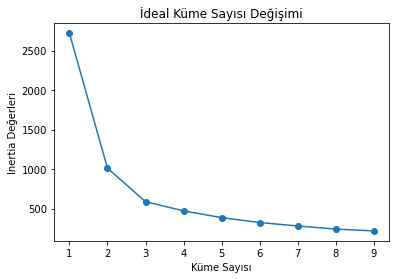

In [15]:
import matplotlib.pyplot as plt
plt.plot(kume_sayisi, inertias, '-o')
plt.title('İdeal Küme Sayısı Değişimi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia Değerleri')
plt.xticks(kume_sayisi)
plt.show()

In [30]:
# Çapraz Tablolar (Cross Tabs)
# Burada n_clusters değeri yukarıdaki grafikteki, grafiğin dirsek yaptığı
# noktadır. Yani azalmayı sert değilde normal yapılan il nokta yani 3.
import pandas as pd
model = KMeans(n_clusters = 3)
labels = model.fit_predict(wheat)

df = pd.DataFrame({'Küme' : labels, 'Yer' : location})
df['Yer'] = df['Yer'].replace({1 : 'Kama', 2 : 'Rosa', 3 : 'Canadian'})

crosstab = pd.crosstab(df['Küme'], df['Yer'])

print(crosstab)

Yer   Canadian  Kama  Rosa
Küme                      
0            2    60    10
1            0     1    60
2           68     9     0
